# Project 2: Regression Modeling 2 of 2

Name: Vanessa Hu 
Date: October 3, 2020

Weeks 2 and 3
Backstory:
Using information we scrape from the web, build linear regression models from which we can learn about movies, sports, or categories.

Data:
acquisition: web scraping
storage: flat files
sources: (as listed below or any other publicly available information)
movie: boxofficemojo.com, imdb.com
sports: sports-reference.com
Skills:
basics of the web (requests, HTML, CSS, JavaScript)

web scraping
numpy and pandas
statsmodels, scikit-learn
Analysis:
linear regression is required, other regression methods are optional
Deliverable/communication:
organized project repository
slide presentation
visual and oral communication in presentations
write-up of process and results


Design:
iterative design process
"MVP"s and building outward
stand-ups/scrums (1 minute progress updates to the class)

More information:
We'll learn about web scraping using two popular tools - BeautifulSoup and Selenium. You must know the very basics of HTML. We can also evolve the way we use Jupyter notebooks; during this project, we begin to use the notebook as a development scratchpad, where we test things out through interactive scripting, but then solidify our work in python modules with reusable functions and classes.

We'll practice using linear regression. We'll have a first taste of feature selection, this time based on our intuition and some trial and error, and we'll build and refine our models.

This project will give you the freedom to challenge yourself, no matter your skill level. Find your boundaries and push them a little further. We are very excited to see what you will learn and do for Project Luther!

# Explore Dataset

## Survey Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
df_raw = pd.read_csv("data/financial_statement_raw.csv") # Import the scraped raw data 

In [3]:
df_raw.shape

(1206, 77)

In [4]:
df_raw.columns

Index(['Symbol', 'Date', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'Common Stock Equity', 'Invested Capital', 'Tangible Book Value',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expense',
       'Operating Income', 'Diluted EPS', 'Diluted Average Shares',
       'Total Expenses', 'Normalized EBITDA', 'Operating Cash Flow',
       'Investing Cash Flow', 'Financing Cash Flow', 'End Cash Position',
       'Issuance of Capital Stock', 'EBITDA', 'index',
       'Capital Lease Obligations', 'Net Tangible Assets', 'Working Capital',
       'Total Debt', 'Share Issued', 'Ordinary Shares Number',
       'Treasury Shares Number', 'Net Non Operating Interest Income Expense',
       'Other Income Expense', 'Pretax Income', 'Tax Provision',
       'Net Income Common Stockholders',
       'Diluted NI Available to Com Stockholders', 'Basic EPS',
       'Basic Average Shares',

In [6]:
df_index=df_raw.reset_index()

In [8]:
# Keep the features with less than 5% of Null values

features_dict=dict((df_raw.isnull().sum().sort_values())[0:30])

In [9]:
features_dict

{'Symbol': 0,
 'Date': 0,
 'Total Assets': 0,
 'Total Liabilities Net Minority Interest': 0,
 'Total Equity Gross Minority Interest': 0,
 'Common Stock Equity': 0,
 'Tangible Book Value': 0,
 'Invested Capital': 2,
 'Total Capitalization': 5,
 'Net Tangible Assets': 10,
 'index': 10,
 'Ordinary Shares Number': 10,
 'Share Issued': 10,
 'End Cash Position': 30,
 'Financing Cash Flow': 30,
 'Operating Cash Flow': 30,
 'Total Revenue': 31,
 'Diluted EPS': 34,
 'Diluted Average Shares': 34,
 'Investing Cash Flow': 36,
 'Free Cash Flow': 40,
 'Normalized Income': 41,
 'Tax Rate for Calcs': 41,
 'Diluted NI Available to Com Stockholders': 41,
 'Net Income Common Stockholders': 41,
 'Tax Effect of Unusual Items': 41,
 'Pretax Income': 41,
 'Net Income from Continuing & Discontinued Operation': 41,
 'Net Income from Continuing Operation Net Minority Interest': 41,
 'Basic Average Shares': 44}

In [14]:
columns_keep=list(features_dict.keys())

In [15]:
df_index=df_index[columns_keep]

In [16]:
df_index.shape

(1206, 30)

In [18]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Symbol                                                      1206 non-null   object 
 1   Date                                                        1206 non-null   object 
 2   Total Assets                                                1206 non-null   float64
 3   Total Liabilities Net Minority Interest                     1206 non-null   float64
 4   Total Equity Gross Minority Interest                        1206 non-null   float64
 5   Common Stock Equity                                         1206 non-null   float64
 6   Tangible Book Value                                         1206 non-null   float64
 7   Invested Capital                                            1204 non-null   float64
 8 

## Visulization

In [19]:
# Reordered list
columns_pick = ['Symbol','Date', 'Diluted EPS','Total Assets','Total Liabilities Net Minority Interest','Total Equity Gross Minority Interest','Common Stock Equity',
'Tangible Book Value','Invested Capital','Total Capitalization','Net Tangible Assets','End Cash Position', 'Financing Cash Flow',
'Operating Cash Flow', 'Total Revenue', 'Basic Average Shares', 'Diluted Average Shares', 'Investing Cash Flow', 'Free Cash Flow', 'Normalized Income', 'Tax Effect of Unusual Items',
'Diluted NI Available to Com Stockholders','Net Income Common Stockholders', 'Pretax Income',
'Net Income from Continuing & Discontinued Operation', 'Net Income from Continuing Operation Net Minority Interest']


In [20]:
len(columns_pick)-2 # Number of features to explore

24

In [21]:
df_pick=df_index[columns_pick]

In [1032]:
df_pick.to_csv('data/financial_statement_pick.csv') # EPS moved to the top and got rid of basic eps, issued shares and average shares

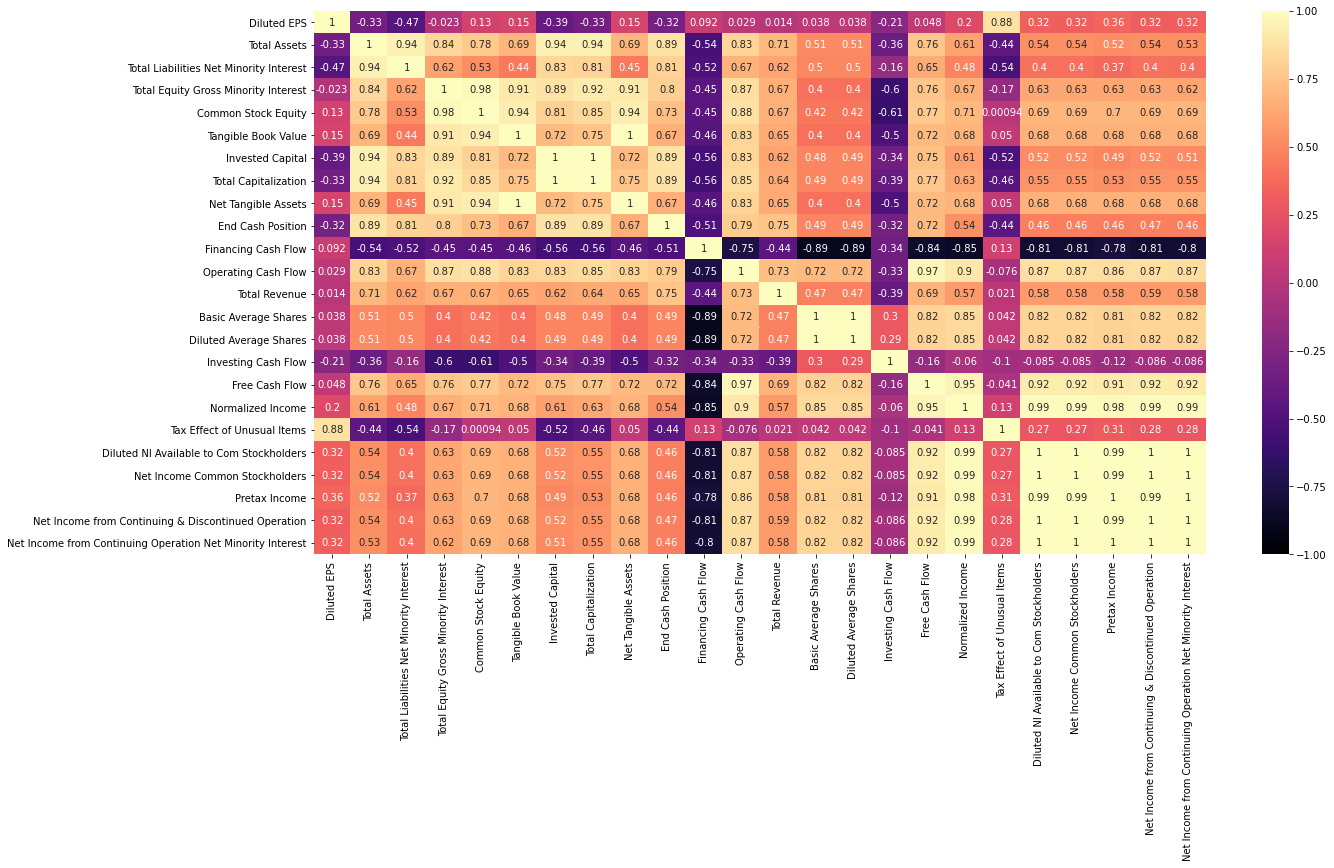

In [1023]:
fig, ax = plt.subplots(figsize=(20,10))  

g=sns.heatmap(df_pick.corr(), cmap="magma", annot=True, vmin=-1, vmax=1);

fig = g.get_figure()
#fig.savefig("corr_heatmap.svg") 

In [1028]:
df_pick.head()

,Symbol,Date,Diluted EPS,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,Total Capitalization,Net Tangible Assets,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Basic Average Shares,Diluted Average Shares,Investing Cash Flow,Free Cash Flow,Normalized Income,Tax Effect of Unusual Items,Diluted NI Available to Com Stockholders,Net Income Common Stockholders,Pretax Income,Net Income from Continuing & Discontinued Operation,Net Income from Continuing Operation Net Minority Interest
0,ACIA,12/31/2019,0.000,721415.0,142992.0,578423.0,578423.0,578423.0,578423.0,578423.0,NaN,36617.0,6933.000,72819.000,464663.00,NaN,42554.0,-103579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACMR,12/31/2019,0.000,217703.0,120382.0,97321.0,97321.0,96977.0,111074.0,97321.0,NaN,117859.0,87445.000,9403.000,107524.00,NaN,19135.0,-5531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADBE,11/30/2019,0.006,20762400.0,10232245.0,10530155.0,10530155.0,-1881609.0,14668422.0,11519079.0,NaN,2650221.0,-2946044.000,4421813.000,11171297.00,NaN,491572.0,-455584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGMH,12/31/2019,0.000,14514.0,2663.0,11851.0,11851.0,4718.0,11851.0,11851.0,NaN,2077.0,-526.329,-196.393,709.63,NaN,20951.0,-5010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIRG,12/31/2019,0.000,54726.0,6822.0,47904.0,47904.0,40407.0,47904.0,47904.0,NaN,13197.0,-392.000,2350.000,55739.00,NaN,10097.0,-2382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Reviewing correlation chart and identify groups of colinearity.
# Using domain knowledge and number of null values to decide which ones to keep.

# Keep 'Invested Capital', drop 'Total Capitalization'.
# Keep 'Tangible Book Value', drop ‘Net Tangible Assets'.
# Keep 'Normalized Income', drop 'Free Cash Flow'.
# Keep 'Diluted Average Shares', drop 'Basic Average Shares'.
# Keep 'Pretax Income', drop 'Diluted NI Available to Com Stockholders','Net Income Common Stockholders',
#'Net Income from Continuing & Discontinued Operation','Net Income from Continuing Operation Net Minority Interest'.
# Drop'Basic EPS', as it's identical as the target.


In [1131]:
df_pick.columns

Index(['Symbol', 'Date', 'Diluted EPS', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital', 'Total Capitalization',
       'Net Tangible Assets', 'End Cash Position', 'Financing Cash Flow',
       'Operating Cash Flow', 'Total Revenue', 'Basic Average Shares',
       'Diluted Average Shares', 'Investing Cash Flow', 'Free Cash Flow',
       'Normalized Income', 'Tax Effect of Unusual Items',
       'Diluted NI Available to Com Stockholders',
       'Net Income Common Stockholders', 'Pretax Income',
       'Net Income from Continuing & Discontinued Operation',
       'Net Income from Continuing Operation Net Minority Interest'],
      dtype='object')

In [1132]:
columns_pick_corr = ['Symbol','Date', 'Diluted EPS','Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital',
       'End Cash Position', 'Financing Cash Flow',
       'Operating Cash Flow', 'Total Revenue',
       'Diluted Average Shares', 'Investing Cash Flow', 
       'Normalized Income', 'Tax Effect of Unusual Items',
       'Pretax Income']


In [1133]:
df_pick_corr=df_keep[columns_pick_corr]

In [1134]:
len(df_pick_corr.columns)

18

In [1135]:
df_pick_corr.corr()

,Diluted EPS,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Diluted Average Shares,Investing Cash Flow,Normalized Income,Tax Effect of Unusual Items,Pretax Income
Diluted EPS,1.000000,-0.328850,-0.466840,-0.022551,0.133562,0.154003,-0.386032,-0.319315,0.092476,0.029250,0.014405,0.038417,-0.211272,0.198945,0.881965,0.356777
Total Assets,-0.328850,1.000000,0.943621,0.842729,0.775466,0.687755,0.940388,0.890036,-0.541560,0.827881,0.706674,0.509295,-0.364075,0.610539,-0.437234,0.516395
Total Liabilities Net Minority Interest,-0.466840,0.943621,1.000000,0.617012,0.528407,0.444300,0.828442,0.806640,-0.515759,0.672456,0.622903,0.497785,-0.163723,0.483379,-0.535255,0.368755
Total Equity Gross Minority Interest,-0.022551,0.842729,0.617012,1.000000,0.984192,0.912456,0.888354,0.803951,-0.448621,0.874405,0.666870,0.401143,-0.599166,0.665304,-0.168864,0.627926
Common Stock Equity,0.133562,0.775466,0.528407,0.984192,1.000000,0.936704,0.811203,0.730543,-0.448103,0.881350,0.667848,0.424096,-0.614296,0.710368,0.000935,0.700425
Tangible Book Value,0.154003,0.687755,0.444300,0.912456,0.936704,1.000000,0.715719,0.667458,-0.461714,0.825774,0.645627,0.403904,-0.501039,0.684982,0.049622,0.679501
Invested Capital,-0.386032,0.940388,0.828442,0.888354,0.811203,0.715719,1.000000,0.886542,-0.561482,0.829007,0.620313,0.485200,-0.343494,0.606593,-0.520866,0.492891
End Cash Position,-0.319315,0.890036,0.806640,0.803951,0.730543,0.667458,0.886542,1.000000,-0.508275,0.785563,0.750989,0.492168,-0.322598,0.538813,-0.444556,0.460481
Financing Cash Flow,0.092476,-0.541560,-0.515759,-0.448621,-0.448103,-0.461714,-0.561482,-0.508275,1.000000,-0.754118,-0.439845,-0.889516,-0.338334,-0.854907,0.125004,-0.780521
Operating Cash Flow,0.029250,0.827881,0.672456,0.874405,0.881350,0.825774,0.829007,0.785563,-0.754118,1.000000,0.734267,0.717239,-0.331416,0.902969,-0.076219,0.862929


In [1136]:
df_pick_corr.to_csv("data/df_pick_corr_2.csv")

## Summary Statistics in R

__Step Method in R Choose A Model By AIC In A Stepwise Algorithm__

***
Input:

>step(model_0<-lm(Diluted.EPS~Total.Assets+Total.Liabilities.Net.Minority.Interest+
                 Common.Stock.Equity+Tangible.Book.Value+Invested.Capital+Total.Capitalization+
                 Net.Tangible.Assets+End.Cash.Position+Investing.Cash.Flow+Normalized.Income+
                 Tax.Effect.of.Unusual.Items+
                 Diluted.NI.Available.to.Com.Stockholders+Net.Income.Common.Stockholders+
                 Pretax.Income+Net.Income.from.Continuing...Discontinued.Operation+
                 Net.Income.from.Continuing.Operation.Net.Minority.Interest,
               data = df_new))
               
Output: 

>lm(formula = Diluted.EPS ~ Total.Liabilities.Net.Minority.Interest + 
    Common.Stock.Equity + Total.Capitalization + Net.Tangible.Assets + 
    End.Cash.Position + Investing.Cash.Flow + Normalized.Income + 
    Tax.Effect.of.Unusual.Items + Diluted.NI.Available.to.Com.Stockholders + 
    Pretax.Income + Net.Income.from.Continuing.Operation.Net.Minority.Interest, 
    data = df_new)
    
***

In [1053]:
columns_step = ["Diluted EPS","Total Liabilities Net Minority Interest", "Common Stock Equity", 
                "Total Capitalization", "Net Tangible Assets", "End Cash Position","Investing Cash Flow", 
                "Normalized Income","Tax Effect of Unusual Items", "Diluted NI Available to Com Stockholders",
                 "Pretax Income", "Net Income from Continuing Operation Net Minority Interest"]

In [1079]:
df_step = df_keep[columns_step] # The features that selected from R in a new dataframe 

## Pair Plot

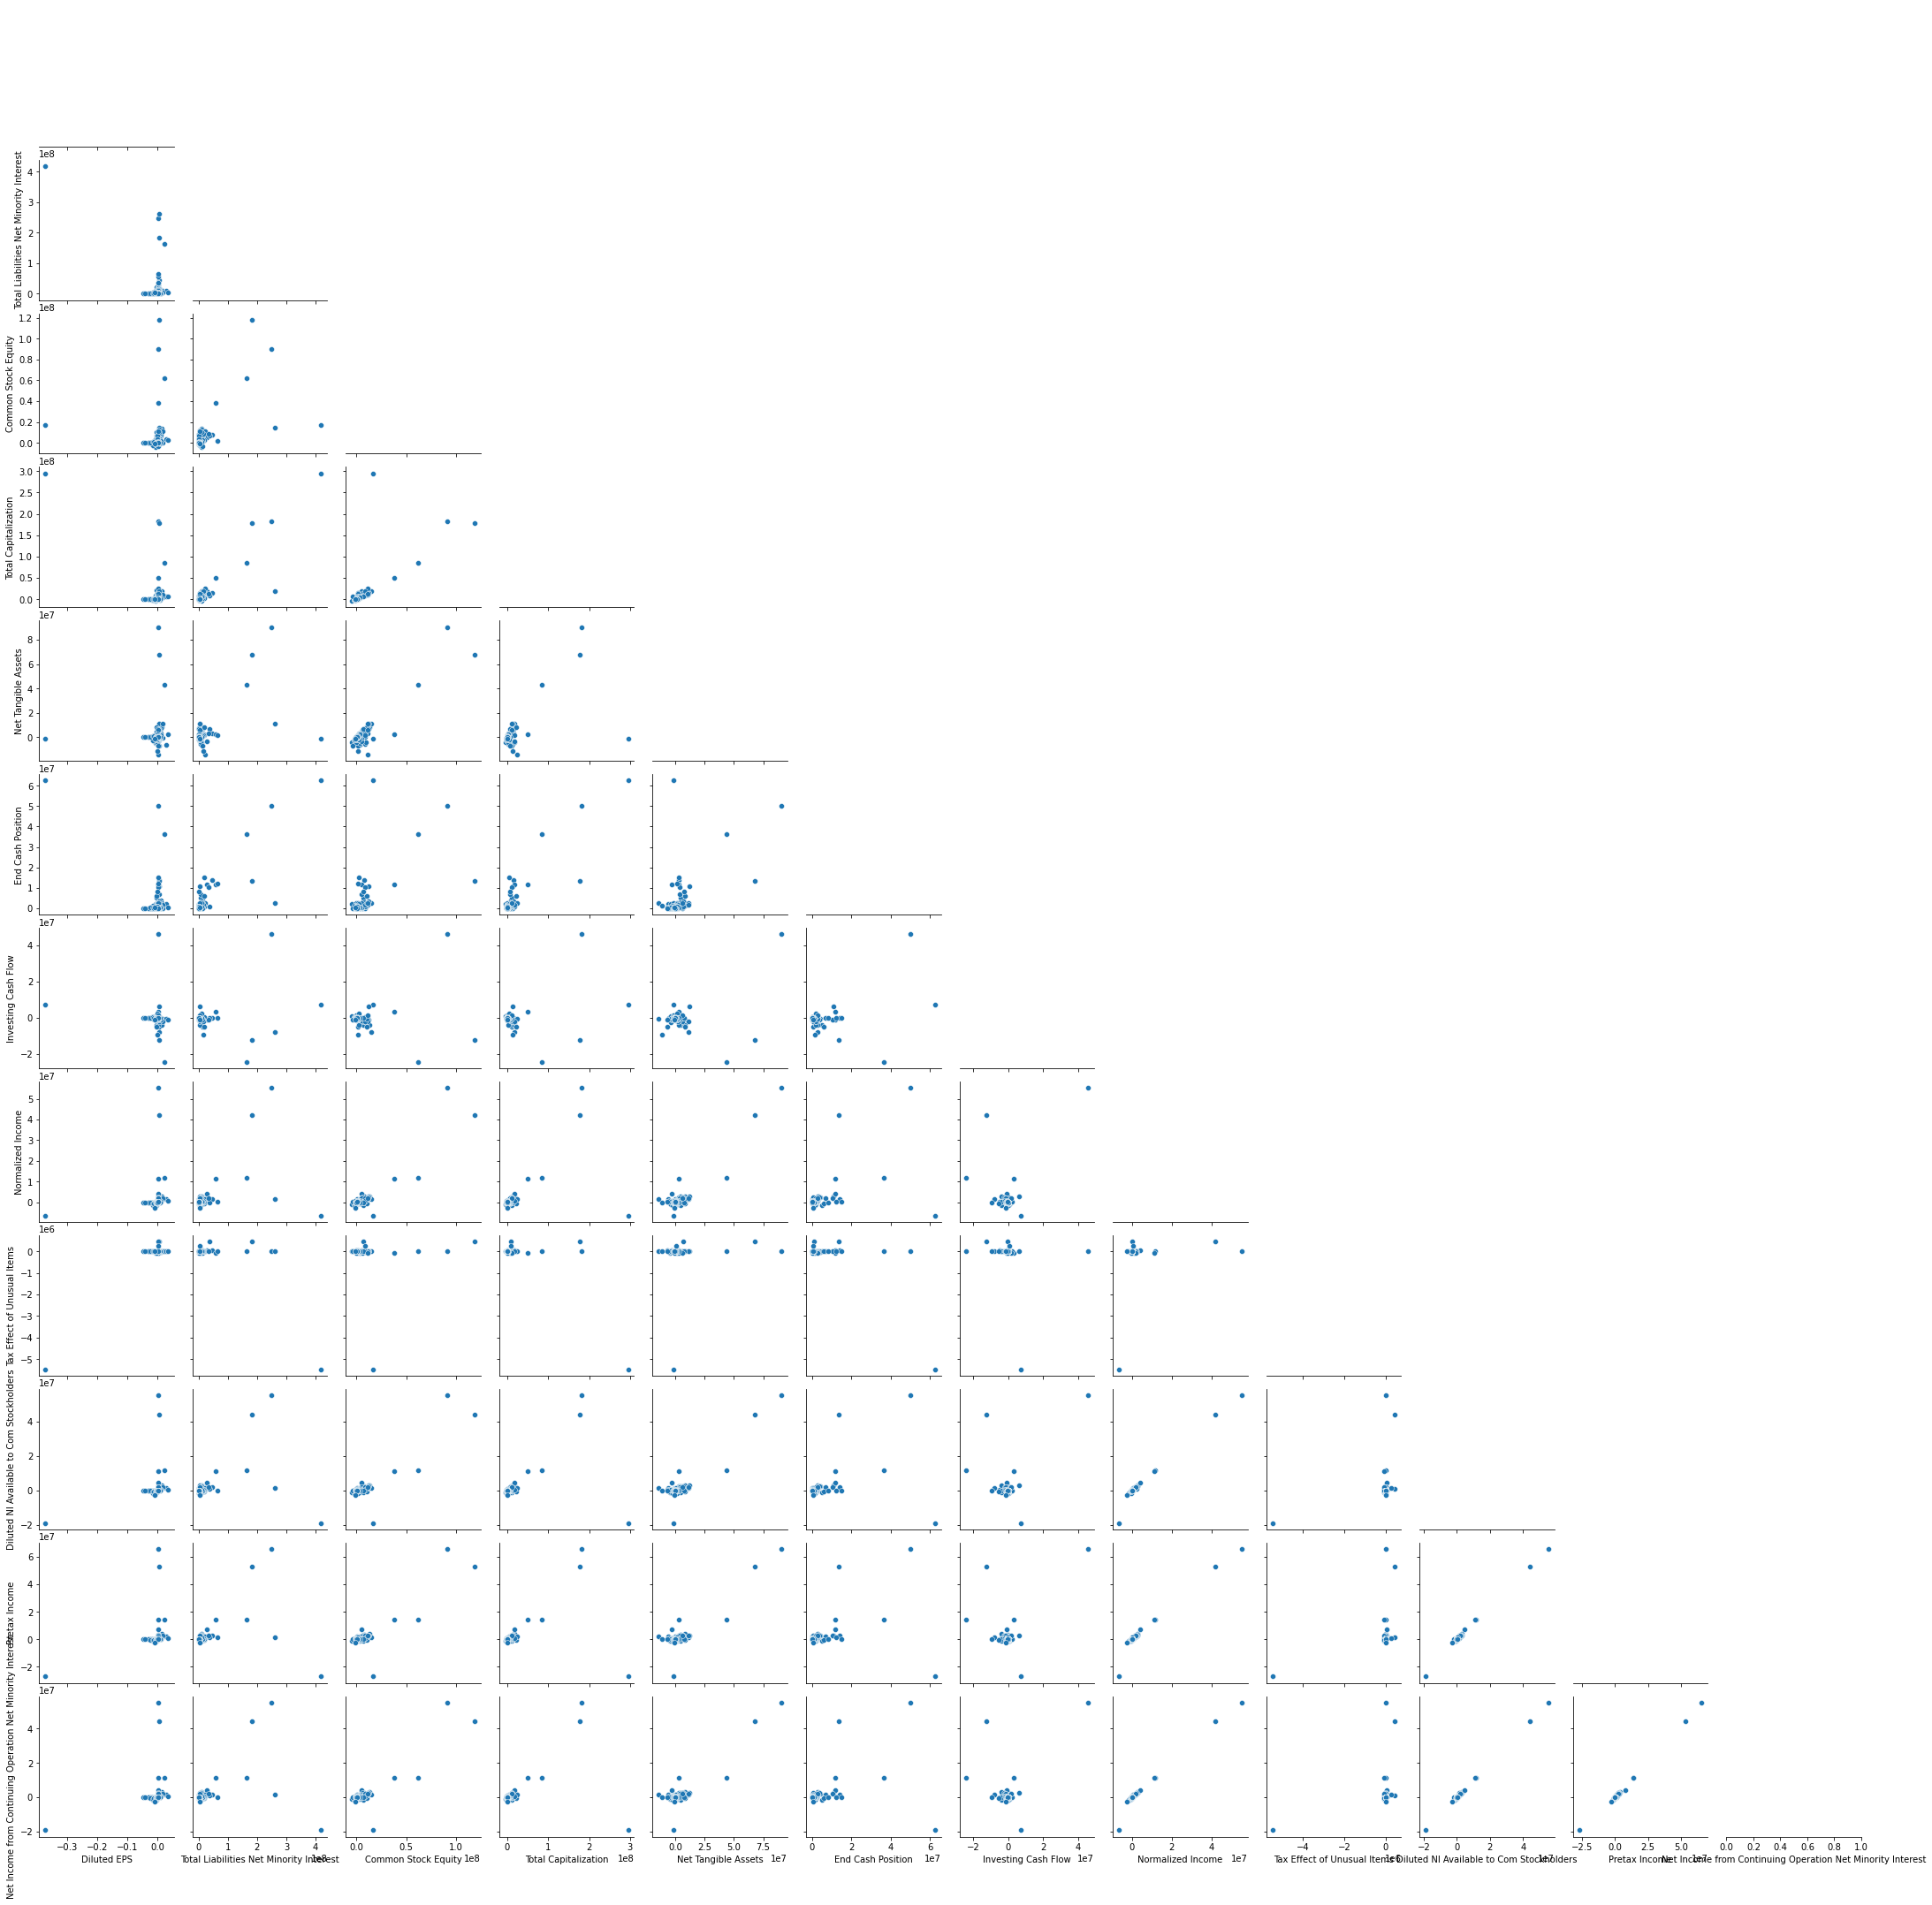

In [1060]:
g = sns.PairGrid(df_step.sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

In [1056]:
df_step.head()

,Diluted EPS,Total Liabilities Net Minority Interest,Common Stock Equity,Total Capitalization,Net Tangible Assets,End Cash Position,Investing Cash Flow,Normalized Income,Tax Effect of Unusual Items,Diluted NI Available to Com Stockholders,Pretax Income,Net Income from Continuing Operation Net Minority Interest
0,0.000,142992.0,578423.0,578423.0,NaN,36617.0,-103579.0,NaN,NaN,NaN,NaN,NaN
1,0.000,120382.0,97321.0,97321.0,NaN,117859.0,-5531.0,NaN,NaN,NaN,NaN,NaN
2,0.006,10232245.0,10530155.0,11519079.0,NaN,2650221.0,-455584.0,NaN,NaN,NaN,NaN,NaN
3,0.000,2663.0,11851.0,11851.0,NaN,2077.0,-5010.0,NaN,NaN,NaN,NaN,NaN
4,0.000,6822.0,47904.0,47904.0,NaN,13197.0,-2382.0,NaN,NaN,NaN,NaN,NaN


In [1078]:
df_step

array([7.95874508e-01, 1.25593076e+00, 9.23223146e-01, 7.87201152e-01,
       5.51048491e-01, 1.03815929e+00, 5.75519199e-01, 2.22352441e+00,
       3.31491218e+00, 4.83602101e-01, 1.56889614e+00, 7.52674110e-01,
       8.39432847e-01, 2.59825415e+00, 7.36853549e-02, 9.11610291e-02,
       2.04255867e-02, 1.78748768e+00, 1.50578423e+00, 2.04031428e+00,
       3.84522184e+00, 1.60523956e+00, 6.18929459e-01, 1.51653598e+00,
       1.25874412e-01, 1.02143189e+00, 1.54729683e-01, 2.89442045e+00,
       7.37827278e-01, 5.35565718e-01, 3.07280353e-01, 1.48825484e+00,
       6.09082416e-01, 8.40334707e-01, 1.89685717e-02, 9.61380929e-01,
       9.46996678e-01, 9.59547973e-01, 2.87791508e+00, 1.14513896e+00,
       4.45518493e-01, 5.74532409e-01, 1.19610780e+00, 6.21152959e-02,
       1.09891248e+00, 1.11059743e+00, 2.36206705e-01, 1.38028688e-01,
       3.78961966e-01, 4.52102056e-01, 8.44427781e-01, 5.77324311e-01,
       4.45449738e+00, 1.07635113e-01, 2.34301516e-01, 1.75913553e-01,
      

In [1058]:
df_step.describe()

,Diluted EPS,Total Liabilities Net Minority Interest,Common Stock Equity,Total Capitalization,Net Tangible Assets,End Cash Position,Investing Cash Flow,Normalized Income,Tax Effect of Unusual Items,Diluted NI Available to Com Stockholders,Pretax Income,Net Income from Continuing Operation Net Minority Interest
count,1172.000000,1.206000e+03,1.206000e+03,1.201000e+03,1.196000e+03,1.176000e+03,1.170000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03
mean,-0.000854,3.151869e+06,1.627405e+06,2.561275e+06,8.011236e+05,6.325759e+05,-3.077927e+05,2.111805e+05,-3.880908e+03,1.990278e+05,2.580686e+05,2.037251e+05
std,0.012147,1.956158e+07,1.134168e+07,1.641447e+07,9.118406e+06,3.694850e+06,2.808356e+06,2.482988e+06,1.648968e+05,2.595787e+06,3.160695e+06,2.597557e+06
min,-0.373500,5.723000e+00,-7.190962e+06,-7.190962e+06,-2.929800e+07,6.000000e-03,-4.913600e+07,-1.009852e+07,-5.471100e+06,-1.874900e+07,-2.714700e+07,-1.922900e+07
25%,-0.001900,2.237050e+04,2.804250e+04,4.652600e+04,2.655750e+03,1.833225e+04,-1.197980e+05,-4.832900e+04,-5.384800e+01,-5.262500e+04,-5.200000e+04,-5.225000e+04
50%,0.000000,1.569190e+05,1.526445e+05,2.008330e+05,6.989000e+04,7.060850e+04,-1.509300e+04,-7.358000e+03,0.000000e+00,-9.402000e+03,-8.869000e+03,-8.921000e+03
75%,0.000000,9.225770e+05,5.040808e+05,7.766560e+05,2.806780e+05,1.978298e+05,-8.446075e+01,2.832100e+04,0.000000e+00,2.687500e+04,3.435100e+04,2.815700e+04
max,0.049200,4.189890e+08,2.014420e+08,2.948820e+08,1.788390e+08,6.248400e+07,4.589600e+07,5.525600e+07,8.909820e+05,5.525600e+07,6.573700e+07,5.525600e+07


In [1086]:
# Reconstruct the linear regression model from R in Python 
lr = LinearRegression()

X = df_fill.iloc[:, 1:]

# Choose the response variable(s)
y = df_fill.iloc[:, 0]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

LinearRegression()

0.8403641191722657

# Data Cleaning

In [1071]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [1137]:
df_pick_corr.isnull().sum().sort_values() # Check all the null values

Symbol                                      0
Date                                        0
Tangible Book Value                         0
Total Assets                                0
Total Liabilities Net Minority Interest     0
Total Equity Gross Minority Interest        0
Common Stock Equity                         0
Invested Capital                            2
End Cash Position                          30
Financing Cash Flow                        30
Operating Cash Flow                        30
Total Revenue                              31
Diluted Average Shares                     34
Diluted EPS                                34
Investing Cash Flow                        36
Tax Effect of Unusual Items                41
Normalized Income                          41
Pretax Income                              41
dtype: int64

In [1139]:
df_pick_corr[df_pick_corr['Invested Capital'].isna()] # Only 2 missing values

,Symbol,Date,Diluted EPS,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Diluted Average Shares,Investing Cash Flow,Normalized Income,Tax Effect of Unusual Items,Pretax Income
1084,PBFS,6/30/2020,0.0017,1526412.0,1302446.0,223966.0,223966.0,214515.0,NaN,156903.0,34243.0,2025.0,64470.0,11170.0,-109474.0,-6490.0,-9.408,-9805.0
1178,TW,12/31/2019,0.0000,5095334.0,502589.0,4592745.0,3378588.0,-770736.0,NaN,461711.0,-218142.0,311003.0,777939.0,156540.0,-44462.0,126121.0,0.000,225326.0


In [1153]:
# Drop all the null values from target

target_na = df_pick_corr[df_pick_corr['Diluted EPS'].isna()]

In [1168]:
target_na.index

Int64Index([ 181,  505,  533,  539,  790,  852,  854,  861,  873,  874,  875,
             886,  891,  897,  898,  907,  918,  921,  935,  951,  954,  962,
             970,  973, 1055, 1104, 1120, 1132, 1147, 1148, 1151, 1152, 1165,
            1166],
           dtype='int64')

In [1171]:
df_target=df_pick_corr.drop(list(target_na.index))

In [1173]:
df_target.isnull().sum().sort_values()

Symbol                                      0
Date                                        0
Diluted EPS                                 0
Total Assets                                0
Total Liabilities Net Minority Interest     0
Total Equity Gross Minority Interest        0
Common Stock Equity                         0
Tangible Book Value                         0
Diluted Average Shares                      0
End Cash Position                           0
Financing Cash Flow                         0
Operating Cash Flow                         0
Total Revenue                               0
Invested Capital                            2
Investing Cash Flow                         5
Normalized Income                          10
Tax Effect of Unusual Items                10
Pretax Income                              10
dtype: int64

In [1178]:
# The 10 companies missing 'Investing Cash Flow', 'Normalized Income', 'Tax Effect of Unusual Items' are
# the same: 'ACIA', 'ACMR', 'ADBE', 'AGMH', 'AIRG', 'API', 'JOBS', 'KERN', 'TWOU', 'VNET'. Drop rows.

list(df_target[df_target['Tax Effect of Unusual Items'].isna()]["Symbol"])
list(df_target[df_target['Normalized Income'].isna()]["Symbol"])
list(df_target[df_target['Pretax Income'].isna()]["Symbol"])

['ACIA', 'ACMR', 'ADBE', 'AGMH', 'AIRG', 'API', 'JOBS', 'KERN', 'TWOU', 'VNET']

In [1183]:
df_target[df_target['Tax Effect of Unusual Items'].isna()].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [1185]:
df_clean = df_target.drop(df_target[df_target['Tax Effect of Unusual Items'].isna()].index)

In [1188]:
df_clean.shape

(1162, 18)

In [1189]:
df_clean.isnull().sum().sort_values()

Symbol                                     0
Normalized Income                          0
Diluted Average Shares                     0
Total Revenue                              0
Operating Cash Flow                        0
Financing Cash Flow                        0
End Cash Position                          0
Tax Effect of Unusual Items                0
Pretax Income                              0
Common Stock Equity                        0
Total Equity Gross Minority Interest       0
Total Liabilities Net Minority Interest    0
Total Assets                               0
Diluted EPS                                0
Date                                       0
Tangible Book Value                        0
Invested Capital                           2
Investing Cash Flow                        5
dtype: int64

In [1187]:
list(df_target[df_target['Investing Cash Flow'].isna()]["Symbol"])

['ADTX', 'CMPI', 'EVOK', 'GLSI', 'MNPR']

In [1190]:
df_final=df_clean.fillna(0) # Fill 0 in the Missing values left

In [1191]:
df_final.isnull().sum().sort_values()

Symbol                                     0
Normalized Income                          0
Investing Cash Flow                        0
Diluted Average Shares                     0
Total Revenue                              0
Operating Cash Flow                        0
Financing Cash Flow                        0
End Cash Position                          0
Invested Capital                           0
Tangible Book Value                        0
Common Stock Equity                        0
Total Equity Gross Minority Interest       0
Total Liabilities Net Minority Interest    0
Total Assets                               0
Diluted EPS                                0
Date                                       0
Tax Effect of Unusual Items                0
Pretax Income                              0
dtype: int64

In [1197]:
df_final.shape

(1162, 18)

In [1193]:
df_final.to_csv("data/df_final.csv") # Train data without nulls and removed high colinearity.

# Base Line Modeling

In [37]:
df_final = pd.read_csv("df_final.csv")

In [38]:
df_final.columns

Index(['Unnamed: 0', 'Symbol', 'Date', 'Diluted EPS', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital', 'End Cash Position',
       'Financing Cash Flow', 'Operating Cash Flow', 'Total Revenue',
       'Diluted Average Shares', 'Investing Cash Flow', 'Normalized Income',
       'Tax Effect of Unusual Items', 'Pretax Income'],
      dtype='object')

In [1338]:
# Explore the most coorelated feature
lr = LinearRegression()

# Choose the most correlated feature to the target
X = df_final["Tax Effect of Unusual Items"].values.reshape(-1, 1)

# Choose the response variable
y = df_final["Diluted EPS"]

# Fit the model 
lr.fit(X, y)
lr.score(X,y)

LinearRegression()

0.7778631304560575

In [39]:
# Setting up the Base line

lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_final.iloc[:, 4:]

# Choose the response variable(s)
y = df_final.iloc[:, 3]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.8418727966438659

In [40]:
# Split the data to Train, Validation and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [1239]:
X_val.shape

(233, 15)

In [41]:
X_val.columns

Index(['Total Assets', 'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital', 'End Cash Position',
       'Financing Cash Flow', 'Operating Cash Flow', 'Total Revenue',
       'Diluted Average Shares', 'Investing Cash Flow', 'Normalized Income',
       'Tax Effect of Unusual Items', 'Pretax Income'],
      dtype='object')

## Comparing Train and Test Data

In [1341]:
# Compare Train set and Validation set

def split_val(X,y):    
    m = LinearRegression()
    m.fit(X_train,y_train)
    return(m.score(X_train,y_train), m.score(X_val,y_val))

In [1424]:
split_val(X,y) # Train > Validation on R Square - Overfitting

(0.9124103070573576, -8.388525247027138)

## Lasso Regression Model

In [1213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [1425]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [1426]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_val.values)

In [1253]:
type(X_train), type(X_tr) 

(pandas.core.frame.DataFrame, numpy.ndarray)

In [1427]:
alphavec = 10**np.linspace(-2,2,200) # Use LassoCV to find a suggested alpha

lasso_model_0 = LassoCV(alphas = alphavec, cv=5)
lasso_model_0.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1428]:
lasso_model_0.alpha_

0.011489510001873092

In [1347]:
list(zip(X_train.columns, lasso_model.coef_))

[('Total Assets', -0.0),
 ('Total Liabilities Net Minority Interest', -0.0),
 ('Total Equity Gross Minority Interest', -0.0),
 ('Common Stock Equity', -0.0),
 ('Tangible Book Value', 0.0),
 ('Invested Capital', -0.0),
 ('End Cash Position', -0.0),
 ('Financing Cash Flow', 0.0),
 ('Operating Cash Flow', -0.0),
 ('Total Revenue', -0.0),
 ('Diluted Average Shares', 0.0),
 ('Investing Cash Flow', -0.0),
 ('Normalized Income', 0.0),
 ('Tax Effect of Unusual Items', 0.0025206850987072576),
 ('Pretax Income', 0.0),
 ('ROA', 0.0),
 ('Diluted Equity', 0.0)]

In [1429]:
(lasso_model_0.score(X_tr,y_train),lasso_model_0.score(X_te,y_val)) # Horrible results

(0.2819776495278088, -0.05233696592416437)

# Feature Engineering

Use domain knowledge to combine some features and re-frame the target variable.

In [59]:
df_final["ROA"] = df_final["Normalized Income"] / df_final["Total Assets"]

In [60]:
df_final["Diluted Equity"] = df_final["Diluted EPS"] * df_final["Diluted Average Shares"]

In [61]:
columns_adjust = ["Diluted Equity", "ROA", 'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital', 'End Cash Position',
       'Financing Cash Flow', 'Operating Cash Flow', 'Total Revenue',
       'Investing Cash Flow', 'Tax Effect of Unusual Items', 'Pretax Income']


In [62]:
df_adjust = df_final[columns_adjust]

In [63]:
df_adjust.shape

(1162, 14)

In [64]:
df_adjust.head()

,Diluted Equity,ROA,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Investing Cash Flow,Tax Effect of Unusual Items,Pretax Income
0,-65.9406,-0.141496,193031.0,273794.0,273794.0,264115.0,407068.0,67028.0,42596.0,-1754.0,190872.0,-32116.0,1.995,-51387.0
1,55786.9560,0.163230,248028000.0,90488000.0,90488000.0,90488000.0,198535000.0,50224000.0,-90976000.0,69391000.0,260174000.0,45896000.0,0.000,65737000.0
2,0.0000,-0.039048,83318.0,131851.0,131851.0,96814.0,131851.0,16930.0,993.0,16092.0,110100.0,-16491.0,-76.820,-7018.0
3,0.0000,0.014186,45289.0,71375.0,71375.0,33958.0,90798.0,4249.0,-3742.0,3224.0,133446.0,-2906.0,38.610,1370.0
4,55.3014,0.095968,202148.0,355651.0,355651.0,147250.0,418651.0,119629.0,-130.0,47112.0,502363.0,-73414.0,0.000,58896.0


In [1324]:
df_adjust.to_csv("data/df_adjust.csv")

## Simple Linear Regression

In [65]:
# Setting up the Base line

lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X = df_adjust.iloc[:, 1:]

# Choose the response variable(s)
y = df_adjust.iloc[:, 0]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9923635479894056

In [1510]:
feature_col = list(list(df_adjust.columns)[1:])

In [1512]:
feature_col

['ROA',
 'Total Liabilities Net Minority Interest',
 'Total Equity Gross Minority Interest',
 'Common Stock Equity',
 'Tangible Book Value',
 'Invested Capital',
 'End Cash Position',
 'Financing Cash Flow',
 'Operating Cash Flow',
 'Total Revenue',
 'Investing Cash Flow',
 'Tax Effect of Unusual Items',
 'Pretax Income']

In [1519]:
# Use residuals to check outliers

df_adjust['res'] = abs(lr.predict(df_adjust[feature_col])-df_adjust['Diluted Equity'])

<ipython-input-1519-33b9caa76caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjust['res'] = abs(lr.predict(df_adjust[feature_col])-df_adjust['Diluted Equity'])


In [1525]:
df_adjust.sort_values(['res']).tail(10)

,Diluted Equity,ROA,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Investing Cash Flow,Tax Effect of Unusual Items,Pretax Income,res
31,2681.6000,0.047289,42523000.0,24970000.0,24941000.0,-29327000.0,57739000.0,5055000.0,6488000.0,9697000.0,22597000.0,-15422000.0,-135339.0,2226000.0,1310.303826
291,12813.3496,0.049706,75937000.0,215189000.0,194928000.0,132358000.0,194928000.0,56453000.0,-2394000.0,44379000.0,175391000.0,-49136000.0,-411200.0,22855000.0,1388.555887
527,5363.4000,0.087397,38977000.0,22650000.0,22525000.0,4622000.0,47118000.0,11631000.0,-7634000.0,9144000.0,22449000.0,-7817000.0,0.0,5160000.0,1462.277855
937,872.3841,0.002246,63736000.0,7940000.0,1452000.0,1418000.0,1468000.0,12282000.0,-419000.0,2666000.0,1686000.0,-89000.0,0.0,1157000.0,1495.661698
147,3380.5728,0.020067,13791717.0,38417766.0,33065886.0,15202287.0,38631660.0,4551464.0,9469906.0,4581691.0,25576204.0,-15609900.0,358253.0,4208111.0,1689.561766
1203,-1654.8259,-0.053050,1837540.0,1464659.0,1453969.0,1453969.0,1453969.0,967743.0,623406.0,-1116816.0,11672024.0,-115483.0,6739.0,-137333.0,1704.455421
175,39540.3000,0.139457,183007000.0,118304000.0,118304000.0,67915000.0,181631000.0,13576000.0,-46031000.0,60675000.0,143015000.0,-12223000.0,446820.0,53036000.0,1823.459288
28,34368.9552,0.120689,74467000.0,201442000.0,201442000.0,178839000.0,205400000.0,18498000.0,-23209000.0,54520000.0,161857000.0,-29491000.0,160132.0,39625000.0,1919.723748
1048,-10282.6929,-0.225451,35179160.0,9613390.0,9571014.0,-5773843.0,26103144.0,6909674.0,7880306.0,3906227.0,28993658.0,-11749571.0,-74938.0,-10224887.0,2222.032849
833,1957.9456,-0.227051,2552536.0,6327828.0,6280783.0,6135083.0,6280783.0,4809440.0,471978.0,-429047.0,4424963.0,-707611.0,-11616.0,-2328242.0,3647.771900


In [1537]:
df_raw.reset_index().iloc[833] # JFU was sued for misleading investors

Symbol                                                            JFU
Date                                                       12/31/2019
Total Assets                                              8.88036e+06
Total Liabilities Net Minority Interest                   2.55254e+06
Total Equity Gross Minority Interest                      6.32783e+06
                                                             ...     
Special Income Charges                                            NaN
INTEREST_INCOME_AFTER_PROVISION_FOR_LOAN_LOSS                     NaN
Other Non Operating Income Expenses                               NaN
Total Money Market Investments                                    NaN
Income from Associates & Other Participating Interests            NaN
Name: 833, Length: 77, dtype: object

In [1539]:
df_raw.reset_index().iloc[1048] # IQ was accused for securities fraud

Symbol                                                             IQ
Date                                                       12/31/2019
Total Assets                                              4.47926e+07
Total Liabilities Net Minority Interest                   3.51792e+07
Total Equity Gross Minority Interest                      9.61339e+06
                                                             ...     
Special Income Charges                                            NaN
INTEREST_INCOME_AFTER_PROVISION_FOR_LOAN_LOSS                     NaN
Other Non Operating Income Expenses                               NaN
Total Money Market Investments                                    NaN
Income from Associates & Other Participating Interests            NaN
Name: 1048, Length: 77, dtype: object

In [43]:
df_index.iloc[28] # Tech Giant

Symbol                                                               GOOG
Date                                                           12/31/2019
Total Assets                                                  2.75909e+08
Total Liabilities Net Minority Interest                        7.4467e+07
Total Equity Gross Minority Interest                          2.01442e+08
Common Stock Equity                                           2.01442e+08
Tangible Book Value                                           1.78839e+08
Invested Capital                                                2.054e+08
Total Capitalization                                            2.054e+08
Net Tangible Assets                                           1.78839e+08
index                                                          12/31/2019
Ordinary Shares Number                                             688335
Share Issued                                                       688335
End Cash Position                     

In [44]:
df_index.iloc[175] # Tech Giant

Symbol                                                               MSFT
Date                                                            6/30/2020
Total Assets                                                  3.01311e+08
Total Liabilities Net Minority Interest                       1.83007e+08
Total Equity Gross Minority Interest                          1.18304e+08
Common Stock Equity                                           1.18304e+08
Tangible Book Value                                            6.7915e+07
Invested Capital                                              1.81631e+08
Total Capitalization                                          1.77882e+08
Net Tangible Assets                                            6.7915e+07
index                                                           6/30/2020
Ordinary Shares Number                                          7.571e+06
Share Issued                                                    7.571e+06
End Cash Position                     

In [45]:
df_index.iloc[1203] # Foreign ADR

Symbol                                                                 YJ
Date                                                           12/31/2019
Total Assets                                                   3.3022e+06
Total Liabilities Net Minority Interest                       1.83754e+06
Total Equity Gross Minority Interest                          1.46466e+06
Common Stock Equity                                           1.45397e+06
Tangible Book Value                                           1.45397e+06
Invested Capital                                              1.45397e+06
Total Capitalization                                          1.45397e+06
Net Tangible Assets                                           1.45397e+06
index                                                          12/31/2019
Ordinary Shares Number                                        2.12941e+06
Share Issued                                                  2.15879e+06
End Cash Position                     

In [46]:
df_index.iloc[147] # Foreign ADR

Symbol                                                                 YY
Date                                                           12/31/2019
Total Assets                                                  5.22095e+07
Total Liabilities Net Minority Interest                       1.37917e+07
Total Equity Gross Minority Interest                          3.84178e+07
Common Stock Equity                                           3.30659e+07
Tangible Book Value                                           1.52023e+07
Invested Capital                                              3.86317e+07
Total Capitalization                                          3.80745e+07
Net Tangible Assets                                           1.52023e+07
index                                                          12/31/2019
Ordinary Shares Number                                        1.61967e+06
Share Issued                                                  1.62836e+06
End Cash Position                     

In [47]:
df_index.iloc[937] # Financial Broker

Symbol                                                              IBKR
Date                                                          12/31/2019
Total Assets                                                  7.1676e+07
Total Liabilities Net Minority Interest                       6.3736e+07
Total Equity Gross Minority Interest                            7.94e+06
Common Stock Equity                                            1.452e+06
Tangible Book Value                                            1.418e+06
Invested Capital                                               1.468e+06
Total Capitalization                                                 NaN
Net Tangible Assets                                            1.418e+06
index                                                         12/31/2019
Ordinary Shares Number                                            415421
Share Issued                                                      415560
End Cash Position                                  

In [48]:
df_index.iloc[527] # Healthcare Giant

Symbol                                                              GILD
Date                                                          12/31/2019
Total Assets                                                  6.1627e+07
Total Liabilities Net Minority Interest                       3.8977e+07
Total Equity Gross Minority Interest                           2.265e+07
Common Stock Equity                                           2.2525e+07
Tangible Book Value                                            4.622e+06
Invested Capital                                              4.7118e+07
Total Capitalization                                          4.4619e+07
Net Tangible Assets                                            4.622e+06
index                                                         12/31/2019
Ordinary Shares Number                                         1.266e+06
Share Issued                                                   1.266e+06
End Cash Position                                  

In [49]:
df_index.iloc[291] # Russa's top search engine 

Symbol                                                               YNDX
Date                                                           12/31/2019
Total Assets                                                  2.91126e+08
Total Liabilities Net Minority Interest                        7.5937e+07
Total Equity Gross Minority Interest                          2.15189e+08
Common Stock Equity                                           1.94928e+08
Tangible Book Value                                           1.32358e+08
Invested Capital                                              1.94928e+08
Total Capitalization                                          1.94928e+08
Net Tangible Assets                                           1.32358e+08
index                                                          12/31/2019
Ordinary Shares Number                                             329858
Share Issued                                                       330666
End Cash Position                     

In [50]:
df_index.iloc[31] 

Symbol                                                               AVGO
Date                                                           10/31/2019
Total Assets                                                   6.7493e+07
Total Liabilities Net Minority Interest                        4.2523e+07
Total Equity Gross Minority Interest                            2.497e+07
Common Stock Equity                                            2.4941e+07
Tangible Book Value                                           -2.9327e+07
Invested Capital                                               5.7739e+07
Total Capitalization                                           5.4981e+07
Net Tangible Assets                                           -2.9298e+07
index                                                          10/31/2019
Ordinary Shares Number                                             398000
Share Issued                                                       398000
End Cash Position                     

In [66]:
# Split into Train, Validation and Test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)


In [1613]:
(df_adjust["Diluted Equity"]>0).sum() # Companies with positive EPS

285

In [1615]:
(df_adjust["Diluted Equity"]).sum() / (df_adjust["Diluted Equity"]>0).sum()

829.3450695614036

In [1608]:
df_adjust[df_adjust["Diluted Equity"]>0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 11 to 1205
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Diluted Equity                           285 non-null    float64
 1   ROA                                      285 non-null    float64
 2   Total Liabilities Net Minority Interest  285 non-null    float64
 3   Total Equity Gross Minority Interest     285 non-null    float64
 4   Common Stock Equity                      285 non-null    float64
 5   Tangible Book Value                      285 non-null    float64
 6   Invested Capital                         285 non-null    float64
 7   End Cash Position                        285 non-null    float64
 8   Financing Cash Flow                      285 non-null    float64
 9   Operating Cash Flow                      285 non-null    float64
 10  Total Revenue                            285 non

In [54]:
df_adjust[df_adjust["Diluted Equity"]<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 1159
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               447 non-null    int64  
 1   Diluted Equity                           447 non-null    float64
 2   ROA                                      447 non-null    float64
 3   Total Liabilities Net Minority Interest  447 non-null    float64
 4   Total Equity Gross Minority Interest     447 non-null    float64
 5   Common Stock Equity                      447 non-null    float64
 6   Tangible Book Value                      447 non-null    float64
 7   Invested Capital                         447 non-null    float64
 8   End Cash Position                        447 non-null    float64
 9   Financing Cash Flow                      447 non-null    float64
 10  Operating Cash Flow                      447 non-

In [1436]:
# Baselin Comparison on Train set and Validation set

def split_val_(X,y):
    m = LinearRegression()
    m.fit(X_train,y_train)
    return(m.score(X_train,y_train),m.score(X_val,y_val))
split_val_(X,y) 

# Score indicates overfitting but it was a huge improvement before feature engineering


(0.9931178035005019, 0.9645397820514844)

## Lasso Modeling

In [67]:
X_test.shape

(233, 13)

In [68]:
# Transform the train set to get ready for Lasso modeling

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_val.values)
alphavec = 10**np.linspace(-2,2,200)

lasso_model_1 = LassoCV(alphas = alphavec, cv=5)  # Auto search the best alpha
lasso_model_2 = Lasso(alpha = 103)  # Manually fine tuning the alpha
lasso_model_1.fit(X_tr, y_train)
lasso_model_2.fit(X_tr, y_train)


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371129.51306582615, tolerance: 363818.94051386946
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526946.2176649421, tolerance: 363818.94051386946
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669682.5293770432, tolerance: 363818.94051386946
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/skl

Lasso(alpha=103)

In [1466]:

lasso_model_1.alpha_
list(zip(X_train.columns, lasso_model_1.coef_))
#test_set_pred = lasso_model.predict(X_te)
#r2_score(y_test, test_set_pred)

10.843659686896109

[('ROA', -0.0),
 ('Total Liabilities Net Minority Interest', 0.0),
 ('Total Equity Gross Minority Interest', 88.66352156890535),
 ('Common Stock Equity', 0.0),
 ('Tangible Book Value', 4.409912741074169),
 ('Invested Capital', 0.0),
 ('End Cash Position', 38.189602313800215),
 ('Financing Cash Flow', -126.17896829729446),
 ('Operating Cash Flow', 0.0),
 ('Total Revenue', 0.10015833930762566),
 ('Investing Cash Flow', 0.0),
 ('Tax Effect of Unusual Items', -0.0),
 ('Pretax Income', 2237.546232167447)]

In [1469]:

list(zip(X_train.columns, lasso_model_2.coef_))

[('ROA', 0.0),
 ('Total Liabilities Net Minority Interest', 0.0),
 ('Total Equity Gross Minority Interest', 0.0),
 ('Common Stock Equity', 0.0),
 ('Tangible Book Value', 0.0),
 ('Invested Capital', 0.0),
 ('End Cash Position', 0.0),
 ('Financing Cash Flow', -55.21261910665487),
 ('Operating Cash Flow', 148.88880599303317),
 ('Total Revenue', 0.0),
 ('Investing Cash Flow', 0.0),
 ('Tax Effect of Unusual Items', -0.0),
 ('Pretax Income', 2131.7184880371983)]

In [1411]:
(lasso_model_1.score(X_tr,y_train),lasso_model_1.score(X_te,y_val)) # LassoCV Score

(0.9926207509223679, 0.9732903199751243)

In [1538]:
(lasso_model_2.score(X_tr,y_train),lasso_model_2.score(X_te,y_val)) 

# Close the gap the most by 0.00797716 - best model

(0.9899212170933728, 0.981944057277908)

## Ridge Modeling

In [1418]:
# Compare with Ridge Model

lr_model_ridge = RidgeCV(alphas = alphavec, cv=5)
lr_model_ridge.fit(X_tr, y_train)

#list(zip(X_tr.columns, lr_model_ridge.coef_))
#test_set_pred = lr_model_ridge.predict(X_te)
#r2_score(y_test, test_set_pred)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [1419]:
(lr_model_ridge.score(X_tr,y_train),lr_model_ridge.score(X_te,y_val)) # Not as good as Lasso

(0.9930934979388399, 0.9694835008517089)

## Residuals on Lasso Model 2

In [1473]:
X_test

,ROA,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Investing Cash Flow,Tax Effect of Unusual Items,Pretax Income
255,0.045939,541025.0,874475.0,874475.0,404808.0,947475.0,129185.0,-63593.0,101283.0,1614762.0,-40587.0,-322.0720,85923.0
111,0.080767,11010.0,15102.0,15102.0,9938.0,15102.0,10098.0,-535.0,6253.0,29971.0,-2900.0,-103.0381,2362.0
1116,0.061524,185336.0,168301.0,168457.0,38876.0,311985.0,14097.0,-13656.0,37174.0,181059.0,-27147.0,-649.6320,24189.0
597,-0.676661,245189.0,49774.0,49774.0,49774.0,159631.0,130689.0,124305.0,-190822.0,40893.0,78450.0,0.0000,-199550.0
766,-0.626477,9697.0,27543.0,15774.0,15774.0,21239.0,18261.0,43035.0,-22185.0,2073.0,-16285.0,0.0000,-23330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0.010446,1414196.0,170703.0,170703.0,161015.0,427368.0,103930.0,139782.0,4124.0,65266.0,-73272.0,-93.9949,19514.0
1083,0.128422,5769300.0,2781400.0,2781400.0,659700.0,3583300.0,1659800.0,-1488200.0,1440900.0,4040500.0,771900.0,0.0000,1437100.0
1196,0.043670,6286000.0,-269000.0,-289000.0,-3924000.0,2685000.0,619000.0,88000.0,400000.0,4475000.0,-376000.0,-235.9551,267000.0
1028,-0.001085,481072.0,158088.0,158088.0,-183170.0,288633.0,69192.0,129438.0,48406.0,461697.0,-249545.0,-26.7090,-9599.0


In [1483]:
test_set_pred = lasso_model_2.predict(X_test.iloc[:,0:])

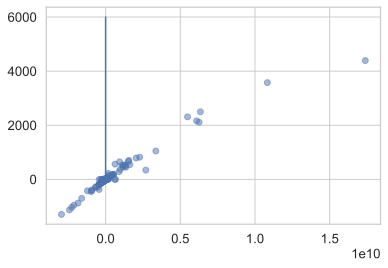

In [1542]:
# Plot the prediction with the test set - Draft
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,6000,1000), np.linspace(0,6000,1000));

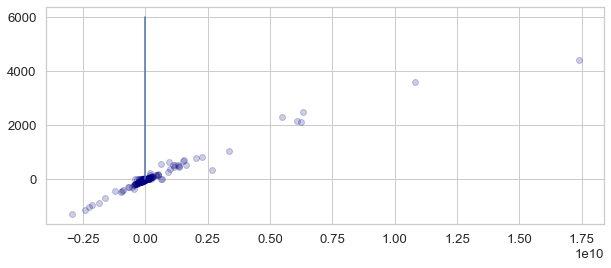

In [93]:
# Plot the prediction with the test set

plt.figure(figsize=(10,4))
plt.scatter(test_set_pred, y_test, alpha=.2, c="navy")
plt.plot(np.linspace(0,6000,1000), np.linspace(0,6000,1000));
plt.savefig("lasso_predictions.svg")

In [1489]:
# Calculating Mean Absolute Error

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

534384176.33464885

## Stats Model

In [75]:
# Re-construct the Lasso Model 2 in the Stats Model to check the P-values

from regressors import stats
stats.summary(lasso_model_2,X_tr,y_train)

Residuals:
       Min     1Q  Median       3Q       Max
-3709.8523 -6.958  2.4008  15.4998  2778.448


Coefficients:
               Estimate  Std. Error  t value   p value
_intercept   122.183520    9.150959  13.3520  0.000000
x1             0.000000    9.153609   0.0000  1.000000
x2             0.000000   54.071287   0.0000  1.000000
x3             0.000000  187.965176   0.0000  1.000000
x4             0.000000  148.544682   0.0000  1.000000
x5             0.000000   24.026073   0.0000  1.000000
x6             0.000000  102.745873   0.0000  1.000000
x7             0.000000   47.157220   0.0000  1.000000
x8           -55.212619   63.394978  -0.8709  0.384093
x9           148.888806   76.289080   1.9516  0.051382
x10            0.000000   19.299316   0.0000  1.000000
x11            0.000000   39.837822   0.0000  1.000000
x12           -0.000000   51.329737  -0.0000  1.000000
x13         2131.718488   41.220481  51.7150  0.000000
---
R-squared:  0.98992,    Adjusted R-squared:  0.98973
F

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_tr))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Diluted Equity   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7570.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:54:35   Log-Likelihood:                -4673.4
No. Observations:                 696   AIC:                             9375.
Df Residuals:                     682   BIC:                             9439.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.1835      7.639     15.995      0.000     107.185     137.182
x1            -1.2481      7.644     -0.163      0.870     -16.256      13.760
x2          -222.9576     56.095     -3.975      0.000    -333.098    -112.818
x3           325.2293    195.877      1.660      0.097     -59.365     709.824
x4          -152.4789    168.301     -0.906      0.365    -482.929     177.972
x5           -23.8117     27.150     -0.877      0.381     -77.119      29.496
x6           132.1085    101.462      1.302      0.193     -67.108     331.325
x7           138.8025     52.367      2.651      0.008      35.982     241.623
x8          -124.1460     69.835     -1.778      0.076    -261.264      12.972
x9          -239.5392     83.324     -2.875      0.004    -403.141     -75.937
x10           61.6737     21.557      2.861      0.004      19.349     103.999
x11           21.1799     52.266      0.405      0.685     -81.441     123.800
x12          -47.5810     66.752     -0.713      0.476    -178.644      83.482
x13         2409.8971     45.196     53.322      0.000    2321.158    2498.636
==============================================================================
Omnibus:                      997.054   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           815356.208
Skew:                           7.209   Prob(JB):                         0.00
Kurtosis:                     170.056   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Generalization

- Why the R squared is so high but MAE is also high? 
- Try to solve the issue with removing outliers.
- Based on the P-value, Pretax Income is the only feature "statistically significant".
- Why not choose the majority of companies share the similar character?
- Create a subset with companies having less than 10 million and more than -10 million pretax income.

## Create the subset

In [148]:
columns_general = ["Symbol", "Diluted Equity", "ROA", 'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Common Stock Equity',
       'Tangible Book Value', 'Invested Capital', 'End Cash Position',
       'Financing Cash Flow', 'Operating Cash Flow', 'Total Revenue',
       'Investing Cash Flow', 'Tax Effect of Unusual Items', 'Pretax Income']


In [149]:
df_general = df_final[columns_general]

In [150]:
df_condition = df_general[(df_general["Pretax Income"] > -10000000) & (df_adjust["Pretax Income"]<10000000)]

In [141]:
df_condition.shape

(1152, 15)

In [143]:
df_condition.to_csv("data/df_condition.csv")

In [144]:
df_condition.to_pickle("df_condition")

In [151]:
df_condition.head()

,Symbol,Diluted Equity,ROA,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Common Stock Equity,Tangible Book Value,Invested Capital,End Cash Position,Financing Cash Flow,Operating Cash Flow,Total Revenue,Investing Cash Flow,Tax Effect of Unusual Items,Pretax Income
0,AAOI,-65.9406,-0.141496,193031.0,273794.0,273794.0,264115.0,407068.0,67028.0,42596.0,-1754.0,190872.0,-32116.0,1.995,-51387.0
2,ALLT,0.0000,-0.039048,83318.0,131851.0,131851.0,96814.0,131851.0,16930.0,993.0,16092.0,110100.0,-16491.0,-76.820,-7018.0
3,ALOT,0.0000,0.014186,45289.0,71375.0,71375.0,33958.0,90798.0,4249.0,-3742.0,3224.0,133446.0,-2906.0,38.610,1370.0
4,ALRM,55.3014,0.095968,202148.0,355651.0,355651.0,147250.0,418651.0,119629.0,-130.0,47112.0,502363.0,-73414.0,0.000,58896.0
5,ALTR,0.0000,-0.009417,386086.0,357059.0,357059.0,56301.0,535727.0,223497.0,191916.0,31393.0,458915.0,-35839.0,-201.150,3388.0


## Simple Linear Regression

In [445]:
# Setting up the Base line

lr = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_condition.iloc[:, 2:]

# Choose the response variable(s)
y = df_condition.iloc[:, 1]

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.9060934413227475

In [462]:
# Split into Train, Validation and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)


In [454]:
# Compare the R-squared ~ close the gap the most ~ best model
(lr.score(X_train,y_train), lr.score(X_val,y_val), lr.score(X_test, y_test))

(0.9445667190481238, 0.69887420154158, 0.9342846358539598)

## Lasso and Ridge Modeling

In [393]:
# Compare with Lasso 

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_val.values)
alphavec = 10**np.linspace(-2,2,200)

lasso_model_1 = LassoCV(alphas = alphavec, cv=5) 
lasso_model_1.fit(X_tr, y_train)



/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33050.44632360898, tolerance: 19852.022585632836
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28872.14489763044, tolerance: 19852.022585632836
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30839.907822996378, tolerance: 19852.022585632836
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/skl

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [160]:
lasso_model_1.alpha_


11.357333583431052

In [161]:
list(zip(X_train.columns, lasso_model_1.coef_))

[('ROA', -0.0),
 ('Total Liabilities Net Minority Interest', 0.0),
 ('Total Equity Gross Minority Interest', 0.0),
 ('Common Stock Equity', 82.2633624547265),
 ('Tangible Book Value', 0.0),
 ('Invested Capital', 0.8870383153634291),
 ('End Cash Position', -0.0),
 ('Financing Cash Flow', -29.716285180812605),
 ('Operating Cash Flow', 0.0),
 ('Total Revenue', -0.0),
 ('Investing Cash Flow', -0.0),
 ('Tax Effect of Unusual Items', 0.0),
 ('Pretax Income', 502.7266749177894)]

In [162]:
(lasso_model_1.score(X_tr,y_train),lasso_model_1.score(X_te,y_val))

(0.9438950130518674, 0.6565727244845462)

In [394]:
lasso_model_2 = Lasso(alpha = 60)
lasso_model_2.fit(X_tr, y_train)

Lasso(alpha=60)

In [395]:
(lasso_model_2.score(X_tr,y_train), lasso_model_2.score(X_te,y_val)) 
# Not as so good as the simple linear regression model

(0.9237270864431162, 0.6644549715118403)

In [370]:
(lasso_model_2.score(X_tr,y_train) - lasso_model_2.score(X_te,y_val))

0.2592721149312759

In [371]:
list(zip(X_train.columns, lasso_model_2.coef_))

[('ROA', 0.0),
 ('Total Liabilities Net Minority Interest', 0.0),
 ('Total Equity Gross Minority Interest', 0.0),
 ('Common Stock Equity', 0.0),
 ('Tangible Book Value', 0.0),
 ('Invested Capital', 0.0),
 ('End Cash Position', 0.0),
 ('Financing Cash Flow', -0.0),
 ('Operating Cash Flow', 56.104104571892854),
 ('Total Revenue', 0.0),
 ('Investing Cash Flow', -0.0),
 ('Tax Effect of Unusual Items', 0.0),
 ('Pretax Income', 455.1511077517689)]

In [372]:
# Ridge
lr_model_ridge = RidgeCV(alphas = alphavec, cv=5)
lr_model_ridge.fit(X_tr, y_train)
(lr_model_ridge.score(X_tr,y_train),lr_model_ridge.score(X_te,y_val))

(0.9524850066983153, 0.6273584684428368)

## Compare MAE

In [396]:
test_set_pred = lasso_model_2.predict(X_test.iloc[:,0:])

In [463]:
test_set_pred_lr = lr.predict(X_test.iloc[:,0:])

In [422]:
r2_score(y_test, test_set_pred_lr)

0.9342846358539598

In [449]:
# The MAE has improved a lot with the simple linear regression model

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred_lr)

45.602227166626676

In [383]:
df_final['Diluted Average Shares'].mean() # Put MAE into context

97922.79381325301

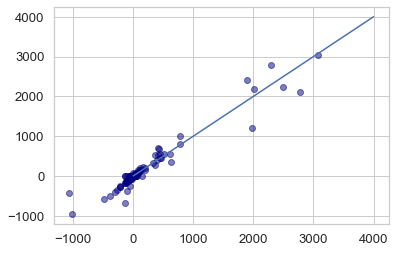

In [466]:
plt.scatter(test_set_pred_lr, y_test, alpha=.5, color = "navy")
plt.plot(np.linspace(0,4000,1000), np.linspace(0,4000,1000));
plt.savefig("linear_model_prediction.svg")

## Stats Model

In [420]:
from regressors import stats
stats.summary(lr,X_tr,y_train)

Residuals:
       Min       1Q  Median       3Q        Max
-7865.7988 -23.5732 -9.7096  27.8757  2712.7857


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -9.710479   21.748106  -0.4465  0.655378
x1          0.009853   21.757940   0.0005  0.999639
x2         -0.000001   27.551144  -0.0000  1.000000
x3         -0.000094  456.367537  -0.0000  1.000000
x4          0.000130  557.994456   0.0000  1.000000
x5         -0.000009   57.543012  -0.0000  1.000000
x6         -0.000008  173.568098  -0.0000  1.000000
x7          0.000036   45.316885   0.0000  0.999999
x8         -0.000063   41.584981  -0.0000  0.999999
x9         -0.000028  107.490622  -0.0000  1.000000
x10        -0.000012   58.988755  -0.0000  1.000000
x11        -0.000046   53.624881  -0.0000  0.999999
x12        -0.000057   24.740340  -0.0000  0.999998
x13         0.000734   35.218406   0.0000  0.999983
---
R-squared:  -0.01784,    Adjusted R-squared:  -0.03741
F-statistic: -0.91 on 13 features


In [378]:

stats.summary(lasso_model_2,X_tr,y_train)

Residuals:
       Min       1Q  Median      3Q        Max
-1474.2593 -11.6737 -0.1839  15.204  1511.8838


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept   65.928908    5.953424  11.0741  0.000000
x1            0.000000    5.956116   0.0000  1.000000
x2            0.000000    7.541973   0.0000  1.000000
x3            0.000000  124.928091   0.0000  1.000000
x4            0.000000  152.747898   0.0000  1.000000
x5            0.000000   15.752081   0.0000  1.000000
x6            0.000000   47.513308   0.0000  1.000000
x7            0.000000   12.405247   0.0000  1.000000
x8           -0.000000   11.383659  -0.0000  1.000000
x9           56.104105   29.424964   1.9067  0.056977
x10           0.000000   16.147846   0.0000  1.000000
x11          -0.000000   14.679515  -0.0000  1.000000
x12           0.000000    6.772531   0.0000  1.000000
x13         455.151108    9.640844  47.2107  0.000000
---
R-squared:  0.92373,    Adjusted R-squared:  0.92226
F-statistic:

## Residual Plot

In [437]:
import scipy.stats as stats

In [429]:
data = pd.DataFrame()

In [467]:
data['predict'] = test_set_pred
data['resid'] = (test_set_pred - y_test)

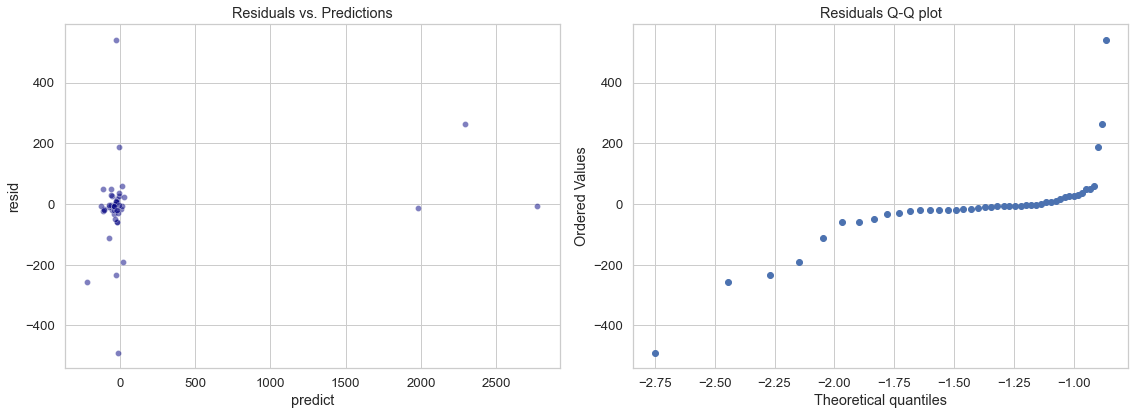

In [468]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=data, x='predict', y='resid', alpha=0.5, ax=axes[0], color = "Navy")
stats.probplot(data['resid'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()
plt.savefig("Residuals Plot.svg")

In [430]:
data['predict_lr'] = test_set_pred_lr
data['resid_lr'] = (test_set_pred_lr - y_test)

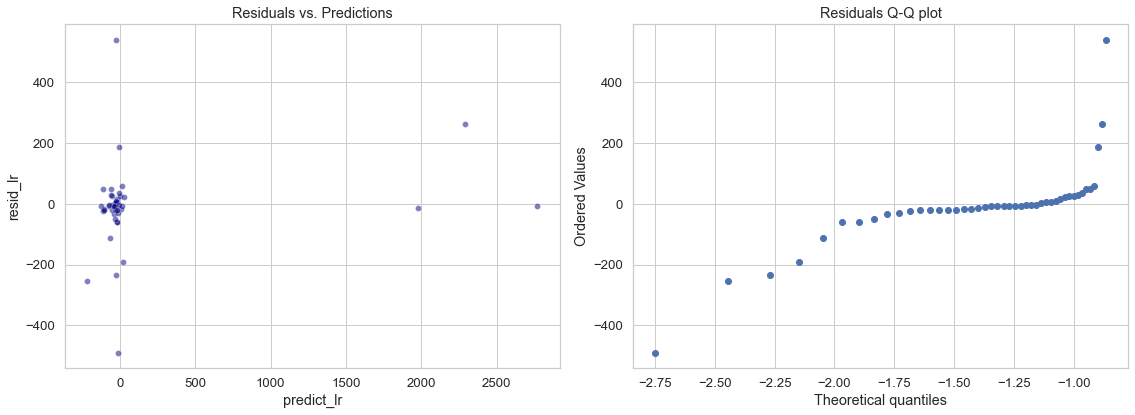

In [440]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=data, x='predict_lr', y='resid_lr', alpha=0.5, ax=axes[0], color = "Navy")
stats.probplot(data['resid_lr'], dist="norm", plot=axes[1])

axes[0].set_title("Residuals vs. Predictions")
axes[1].set_title("Residuals Q-Q plot")

plt.tight_layout()
plt.savefig("Residuals Plot_lr.svg")

## Cross Validation

In [459]:
from sklearn.model_selection import cross_validate

def cv_results(X, y, model=Lasso(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(X.columns, final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}') 

In [460]:
cv_results(X,y) # Cross-validation Results

Test r2 :               Mean = 0.8433	Range = (0.5535, 0.9588)
Train/Test r2 Ratio :   Mean = 1.111	Range = (0.9052, 1.6922)

Best Model Feature coefficient results:
ROA:             0.00
Total Liabilities Net Minority Interest: 0.00
Total Equity Gross Minority Interest: 0.00
Common Stock Equity: 0.00
Tangible Book Value: 0.00
Invested Capital: 0.00
End Cash Position: 0.00
Financing Cash Flow: -0.00
Operating Cash Flow: 0.00
Total Revenue:   0.00
Investing Cash Flow: -0.00
Tax Effect of Unusual Items: 0.00
Pretax Income:   0.00
